In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')

In [35]:
dataset = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

In [36]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [37]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [38]:
kernal_size = (3,3)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.ndim, x_test.ndim

(4, 4)

In [39]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, kernal_size, strides =2, activation = 'relu')(i)
x = Conv2D(128, kernal_size, strides =2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation = 'softmax')(x)

model = Model(i, x)

In [40]:
model.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [41]:
model_ = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2668 - accuracy: 0.9303 - val_loss: 0.0769 - val_accuracy: 0.9770
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0979 - accuracy: 0.9710 - val_loss: 0.0546 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0772 - accuracy: 0.9765 - val_loss: 0.0503 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.0580 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0532 - accuracy: 0.9841 - val_loss: 0.0468 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0577 -

In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0586 - accuracy: 0.9858


[0.05864500626921654, 0.98580002784729]

In [ ]:
# model accuracy = 98.5%   (much better then if do classification using simple ANN)

<function matplotlib.pyplot.legend(*args, **kwargs)>

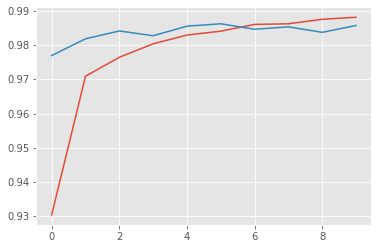

In [43]:
plt.plot(model_.history['accuracy'], label = 'accuracy')
plt.plot(model_.history['val_accuracy'], label = 'val_accuracy')
plt.legend